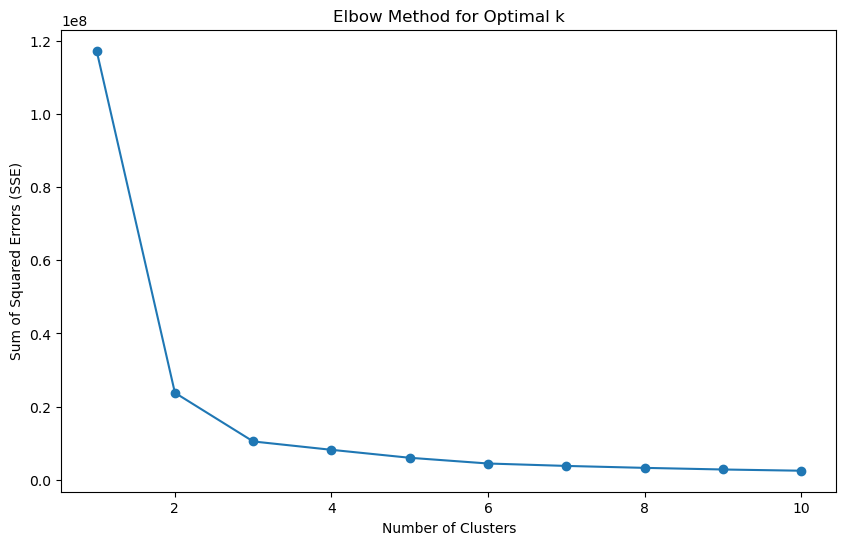

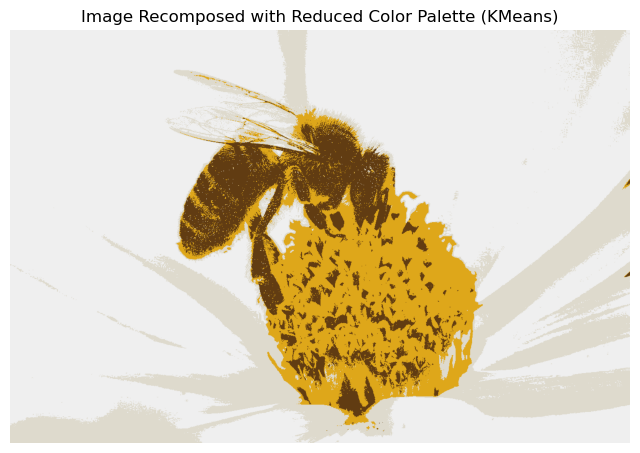

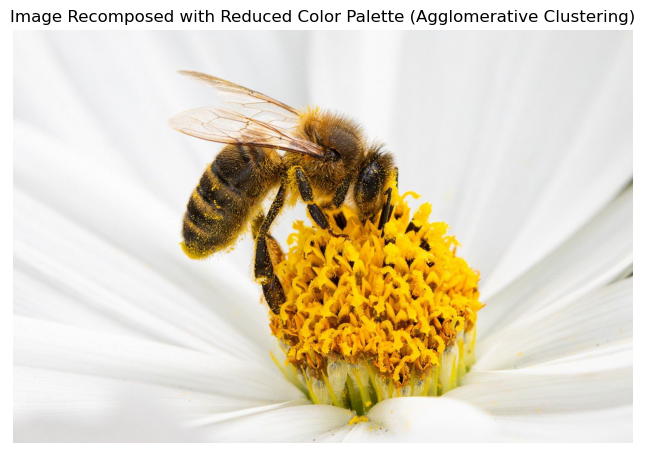

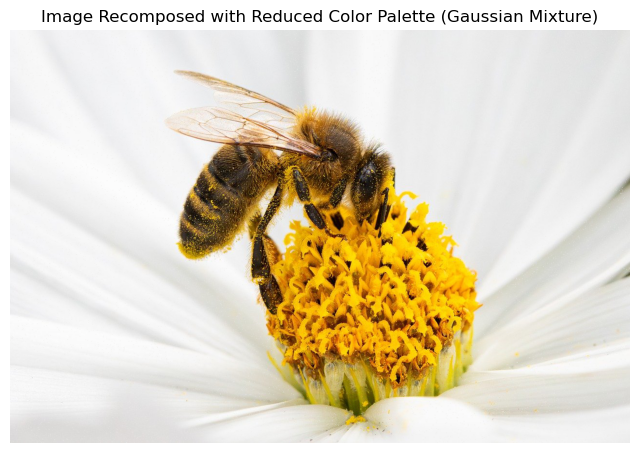

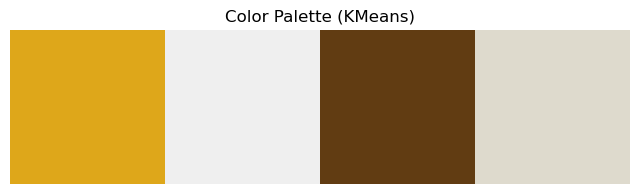

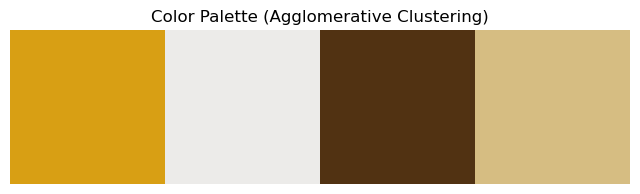

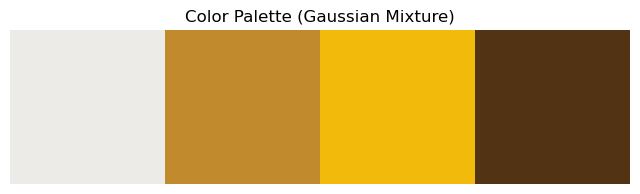

In [11]:
# Importar las librerías necesarias
from sklearn.cluster import MiniBatchKMeans, KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

# Cargar la imagen
image_path = r"C:\Users\Scarlett\Downloads\honey-bee-8196854_1280.png"
image = io.imread(image_path)
image_rgb = image[:, :, :3]
pixels = np.reshape(image_rgb, (-1, 3))

# Reducir el tamaño de la muestra para el clustering
if len(pixels) > 10000:
    indices = np.random.choice(len(pixels), 10000, replace=False)
    sample_pixels = pixels[indices]
else:
    sample_pixels = pixels

# Determinar el número óptimo de clusters usando el método del codo con MiniBatchKMeans
sse = []
for k in range(1, 11):
    mb_MiniBatchKMeans = KMeans(n_clusters=k, n_init=3)  # batch_size=4096, n_init=3
    mb_MiniBatchKMeans.fit(sample_pixels)
    sse.append(mb_MiniBatchKMeans.inertia_)

# Plot SSE para cada número de clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# Ajustar MiniBatchKMeans con el número óptimo de clusters seleccionado (por ejemplo, 4)
k = 4  # Este valor debería ajustarse basado en el gráfico anterior
final_MiniBatchKMeans = KMeans(n_clusters=k, n_init=10)
final_MiniBatchKMeans.fit(pixels)
new_colors_kmeans = final_MiniBatchKMeans.cluster_centers_[final_MiniBatchKMeans.labels_]

# Reconstruir la imagen con la paleta de colores reducida - KMeans
new_image_kmeans = np.reshape(new_colors_kmeans, image_rgb.shape)
plt.figure(figsize=(8, 6))
plt.imshow(new_image_kmeans.astype(np.uint8))
plt.title('Image Recomposed with Reduced Color Palette (KMeans)')
plt.axis('off')
plt.show()

# Usar AgglomerativeClustering para agrupar los píxeles de la muestra
clustering = AgglomerativeClustering(n_clusters=k)
labels2 = clustering.fit_predict(sample_pixels)

# Asignar a los píxeles originales basándose en los clusters de la muestra
new_colors_agglomerative = np.zeros_like(sample_pixels)
for cluster_label in np.unique(labels2):
    cluster_pixels = sample_pixels[labels2 == cluster_label]
    cluster_mean_color = np.mean(cluster_pixels, axis=0)
    new_colors_agglomerative[labels2 == cluster_label] = cluster_mean_color

# Crear una copia de la imagen original para reconstruir con AgglomerativeClustering
new_image_agglomerative = np.copy(pixels)
new_image_agglomerative[indices] = new_colors_agglomerative
new_image_agglomerative = np.reshape(new_image_agglomerative, image_rgb.shape)

# Mostrar la imagen resultante - AgglomerativeClustering
plt.figure(figsize=(8, 6))
plt.imshow(new_image_agglomerative.astype(np.uint8))
plt.title('Image Recomposed with Reduced Color Palette (Agglomerative Clustering)')
plt.axis('off')
plt.show()

# Aplicar GaussianMixture para agrupar los píxeles de la muestra
gmm = GaussianMixture(n_components=k, covariance_type='tied', max_iter=100, random_state=42)
gmm.fit(sample_pixels)
labels_gmm = gmm.predict(sample_pixels)

# Asignar a los píxeles originales basándose en los clusters de GaussianMixture
new_colors_gmm = np.zeros_like(sample_pixels)
for cluster_label in np.unique(labels_gmm):
    cluster_pixels = sample_pixels[labels_gmm == cluster_label]
    cluster_mean_color = np.mean(cluster_pixels, axis=0)
    new_colors_gmm[labels_gmm == cluster_label] = cluster_mean_color

# Crear una copia de la imagen original para reconstruir con GaussianMixture
new_image_gmm = np.copy(pixels)
new_image_gmm[indices] = new_colors_gmm
new_image_gmm = np.reshape(new_image_gmm, image_rgb.shape)

# Mostrar la imagen resultante - GaussianMixture
plt.figure(figsize=(8, 6))
plt.imshow(new_image_gmm.astype(np.uint8))
plt.title('Image Recomposed with Reduced Color Palette (Gaussian Mixture)')
plt.axis('off')
plt.show()

# Generar paletas de colores para cada algoritmo
def generate_color_palette(centroids, title):
    palette = centroids.astype(int)
    plt.figure(figsize=(8, 2))
    plt.imshow([palette], aspect='auto')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Paleta de colores para KMeans
generate_color_palette(final_MiniBatchKMeans.cluster_centers_, 'Color Palette (KMeans)')

# Paleta de colores para AgglomerativeClustering
palette_agglomerative = np.array([np.mean(sample_pixels[labels2 == i], axis=0) for i in np.unique(labels2)])
generate_color_palette(palette_agglomerative, 'Color Palette (Agglomerative Clustering)')

# Paleta de colores para GaussianMixture
palette_gmm = np.array([np.mean(sample_pixels[labels_gmm == i], axis=0) for i in np.unique(labels_gmm)])
generate_color_palette(palette_gmm, 'Color Palette (Gaussian Mixture)')
